Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy import stats as st
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve, auc

In [ ]:
data = pd.read_csv('Bioinformatics.csv')
data.info

<bound method DataFrame.info of            id diagnosis  ...  symmetry_worst   fractal_dimension_worst
0      842302         M  ...           0.4601                  0.11890
1      842517         M  ...           0.2750                  0.08902
2    84300903         M  ...           0.3613                  0.08758
3    84348301         M  ...           0.6638                  0.17300
4    84358402         M  ...           0.2364                  0.07678
..        ...       ...  ...              ...                      ...
564    926424         M  ...           0.2060                  0.07115
565    926682         M  ...           0.2572                  0.06637
566    926954         M  ...           0.2218                  0.07820
567    927241         M  ...           0.4087                  0.12400
568     92751         B  ...           0.2871                  0.07039

[569 rows x 32 columns]>

**PART I**

1. Missing data

In [ ]:
data.isnull().values.any()

True

In [ ]:
data.isna().mean().round(4) * 100

id                         0.00
diagnosis                  0.00
radius_mean                4.92
texture_mean               0.00
perimeter_mean             0.00
area_mean                  7.21
smoothness_mean            0.00
compactness_mean           0.00
concavity_mean             0.00
concave_points_mean        0.00
symmetry_mean              0.00
fractal_dimension_mean     0.00
radius_sd                  0.00
texture_sd                 0.00
perimeter_sd               0.00
area_sd                    0.00
smoothness_sd              0.00
compactness_sd             0.00
concavity_sd               0.00
concave_points_sd          0.00
symmetry_sd                0.00
fractal_dimension_sd       0.00
radius_worst               0.00
texture_worst              0.00
perimeter_worst            0.00
area_worst                 0.00
smoothness_worst           0.00
compactness_worst          0.00
concavity_worst            0.00
concave_points_worst       0.00
symmetry_worst             0.00
fractal_

4.92% of data is missing in column radius_mean and
7.21% of data is missing in column area_mean.

The missing data can be filled by using the interpolate()function.

In [ ]:
new_data = data.interpolate()

In [ ]:
new_data.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_sd                  0
texture_sd                 0
perimeter_sd               0
area_sd                    0
smoothness_sd              0
compactness_sd             0
concavity_sd               0
concave_points_sd          0
symmetry_sd                0
fractal_dimension_sd       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [ ]:
new_data.head()#no missing data

id diagnosis  ...  symmetry_worst   fractal_dimension_worst
0    842302         M  ...           0.4601                  0.11890
1    842517         M  ...           0.2750                  0.08902
2  84300903         M  ...           0.3613                  0.08758
3  84348301         M  ...           0.6638                  0.17300
4  84358402         M  ...           0.2364                  0.07678

[5 rows x 32 columns]

In [ ]:
new_data = new_data.drop('id', axis=1) #'id' plays no role in the classification of tumor. Hence, it is removed
new_data.head()

diagnosis  radius_mean  ...  symmetry_worst   fractal_dimension_worst
0         M        17.99  ...           0.4601                  0.11890
1         M        20.57  ...           0.2750                  0.08902
2         M        19.69  ...           0.3613                  0.08758
3         M        19.99  ...           0.6638                  0.17300
4         M        20.29  ...           0.2364                  0.07678

[5 rows x 31 columns]

2. Distribution Visualization with the help of KDE plot

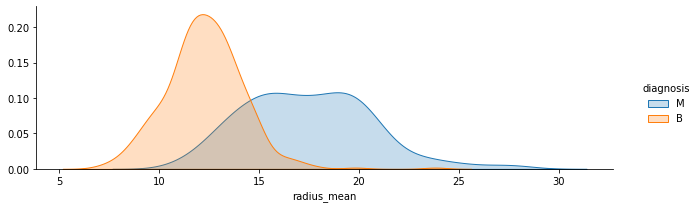

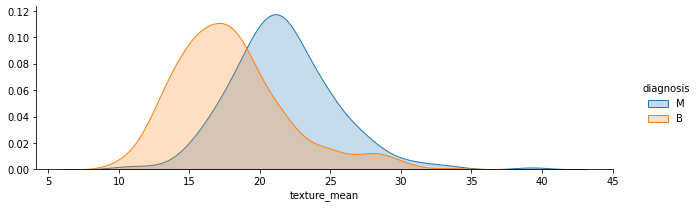

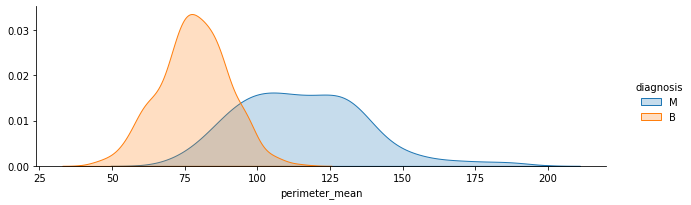

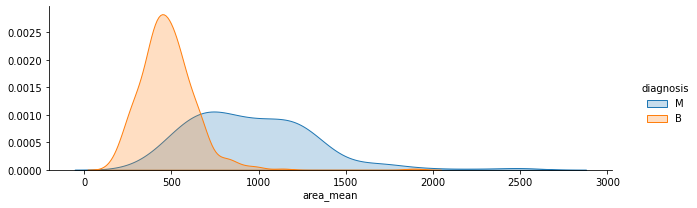

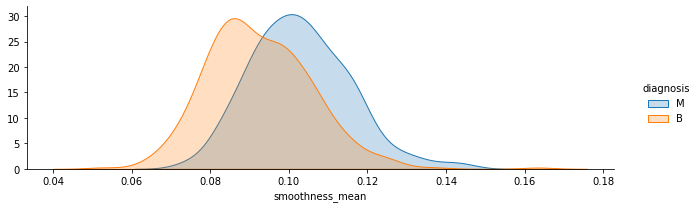

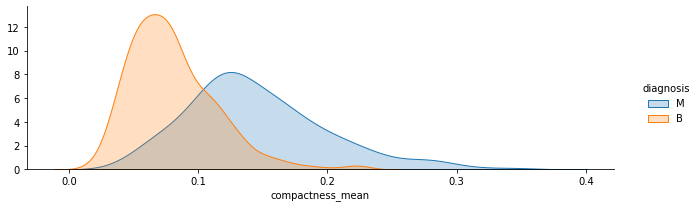

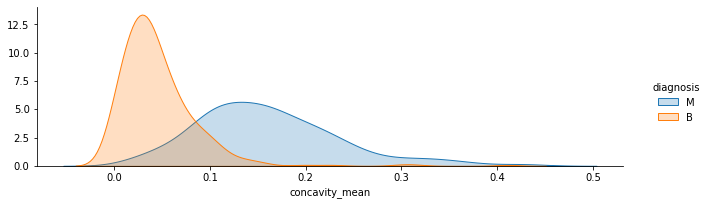

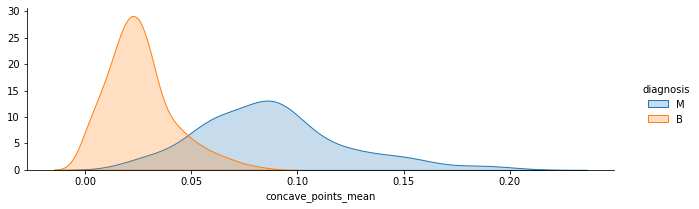

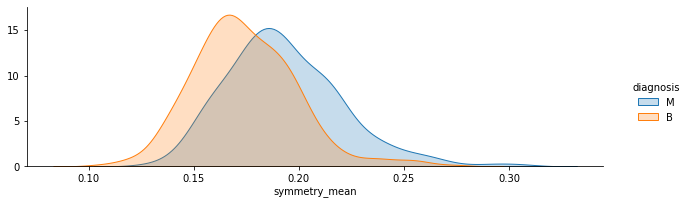

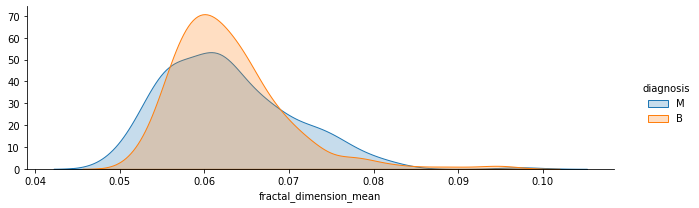

In [ ]:
mean_col = [col for col in new_data.columns if col.endswith('_mean')]
for i in range(len(mean_col)):
    sns.FacetGrid(new_data,hue="diagnosis",aspect=3,margin_titles=True).map(sns.kdeplot,mean_col[i],shade= True).add_legend()


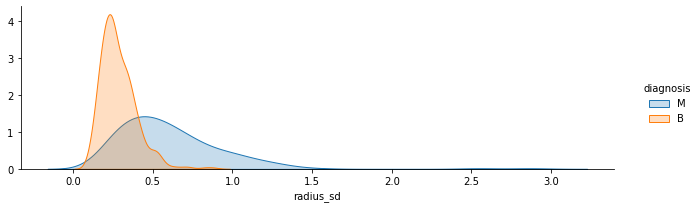

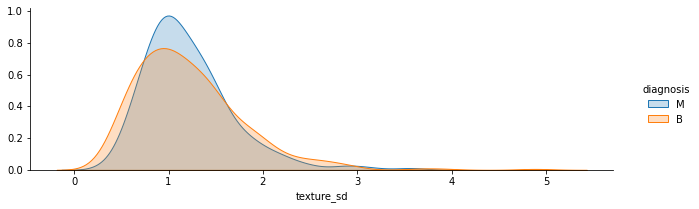

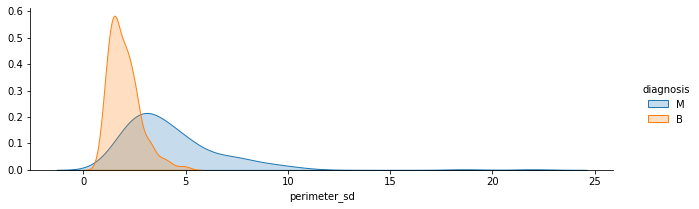

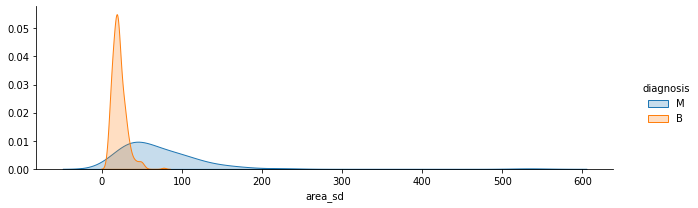

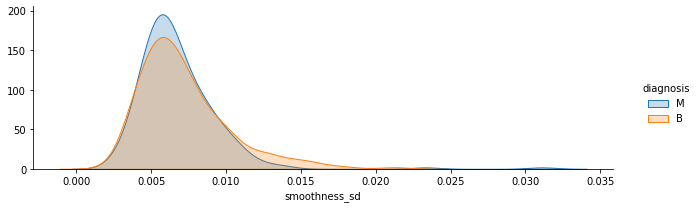

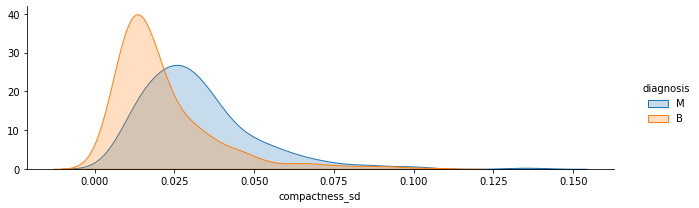

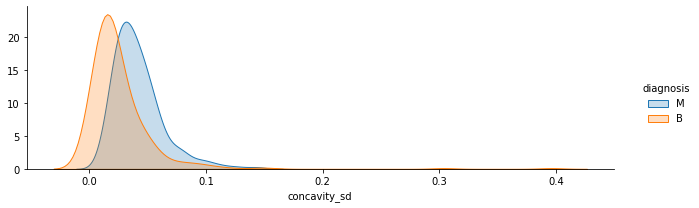

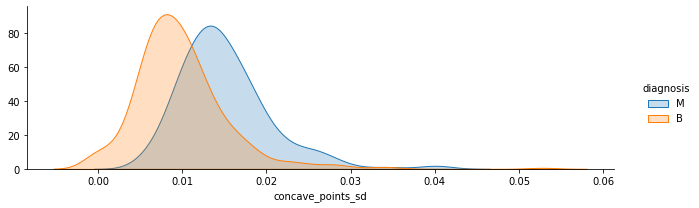

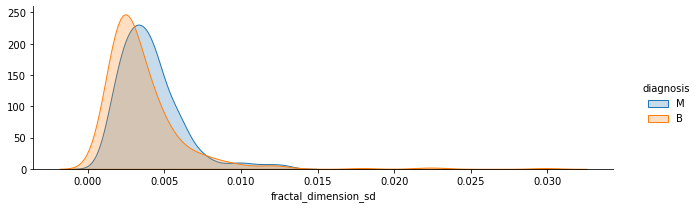

In [ ]:
sd_col = [col for col in new_data.columns if col.endswith('_sd')]
for i in range(len(sd_col)):
    sns.FacetGrid(new_data,hue="diagnosis",aspect=3,margin_titles=True).map(sns.kdeplot,sd_col[i],shade= True).add_legend()

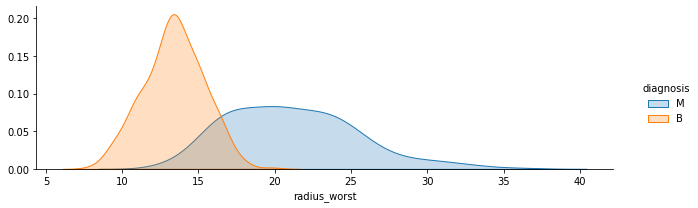

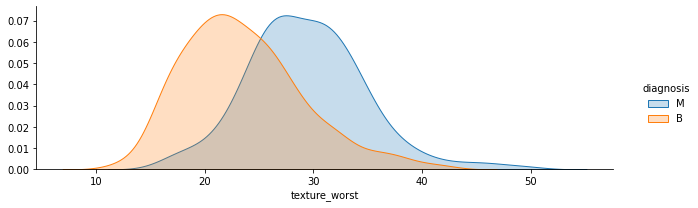

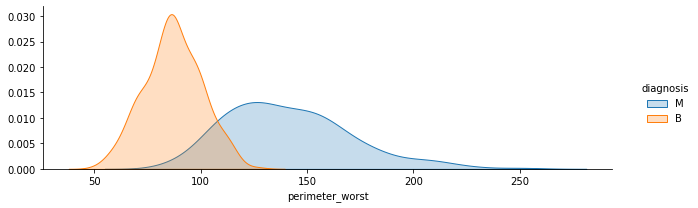

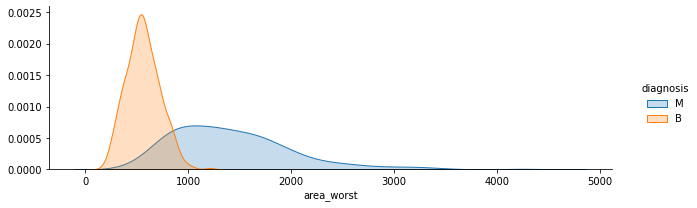

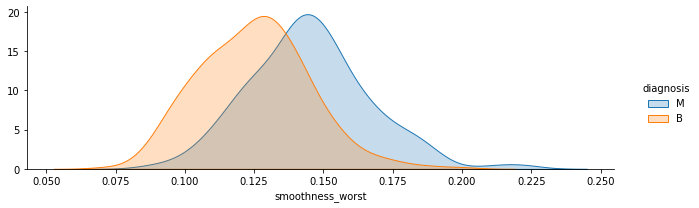

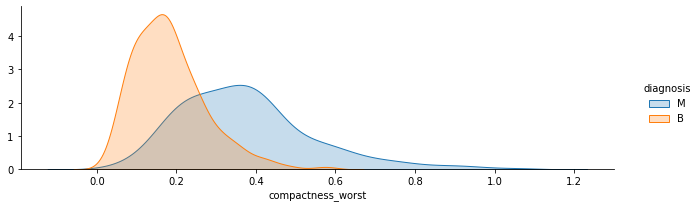

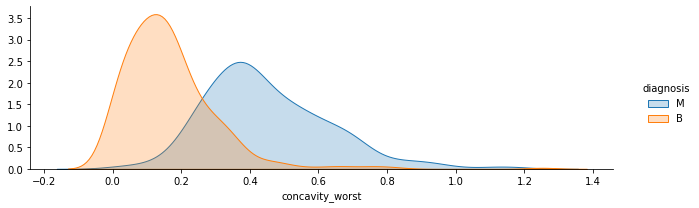

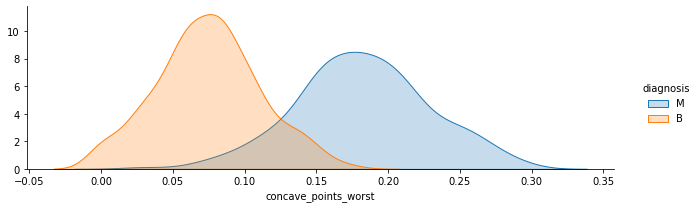

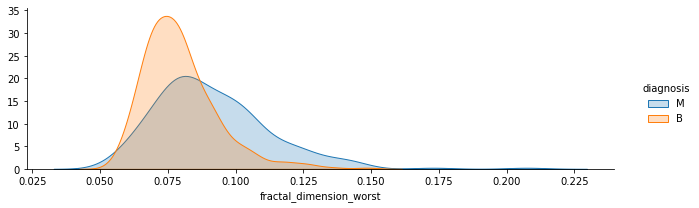

In [ ]:
worst_col = [col for col in new_data.columns if col.endswith('_worst')]
for i in range(len(worst_col)):
    sns.FacetGrid(new_data,hue="diagnosis",aspect=3,margin_titles=True).map(sns.kdeplot,worst_col[i],shade= True).add_legend()

2.Distribution Visualization with the help of pair plot

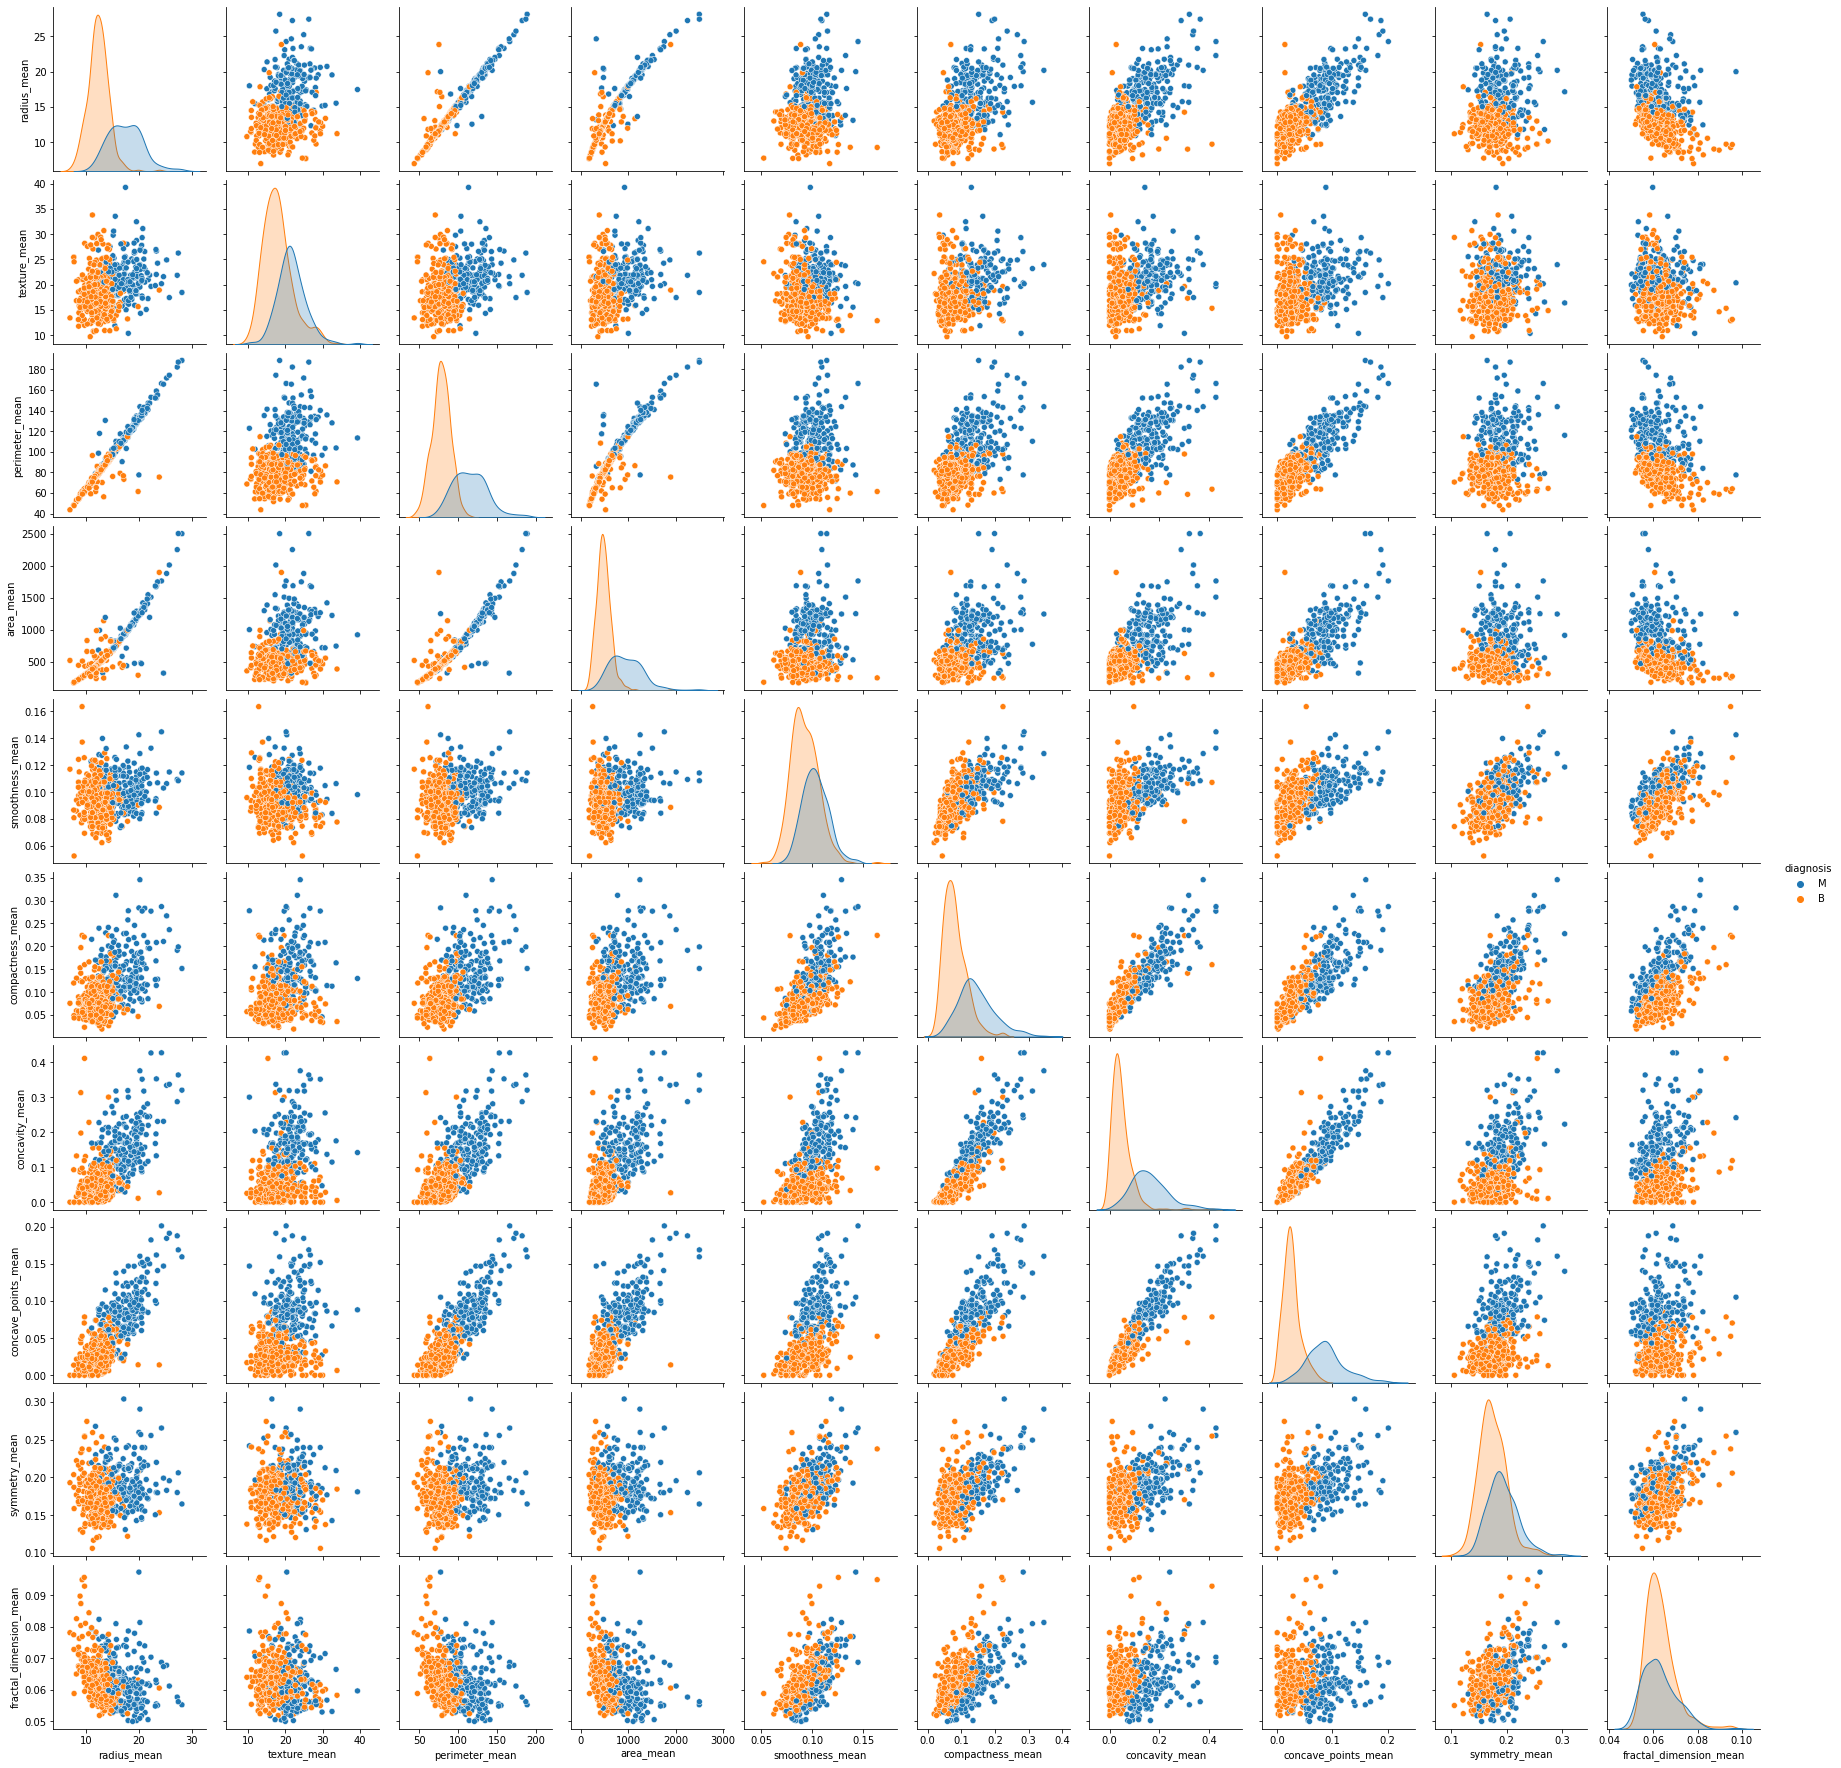

In [ ]:
rcParams['figure.figsize'] = 8,5
cols = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean','fractal_dimension_mean','diagnosis']
sns_plot = sns.pairplot(data=new_data[cols],hue='diagnosis')

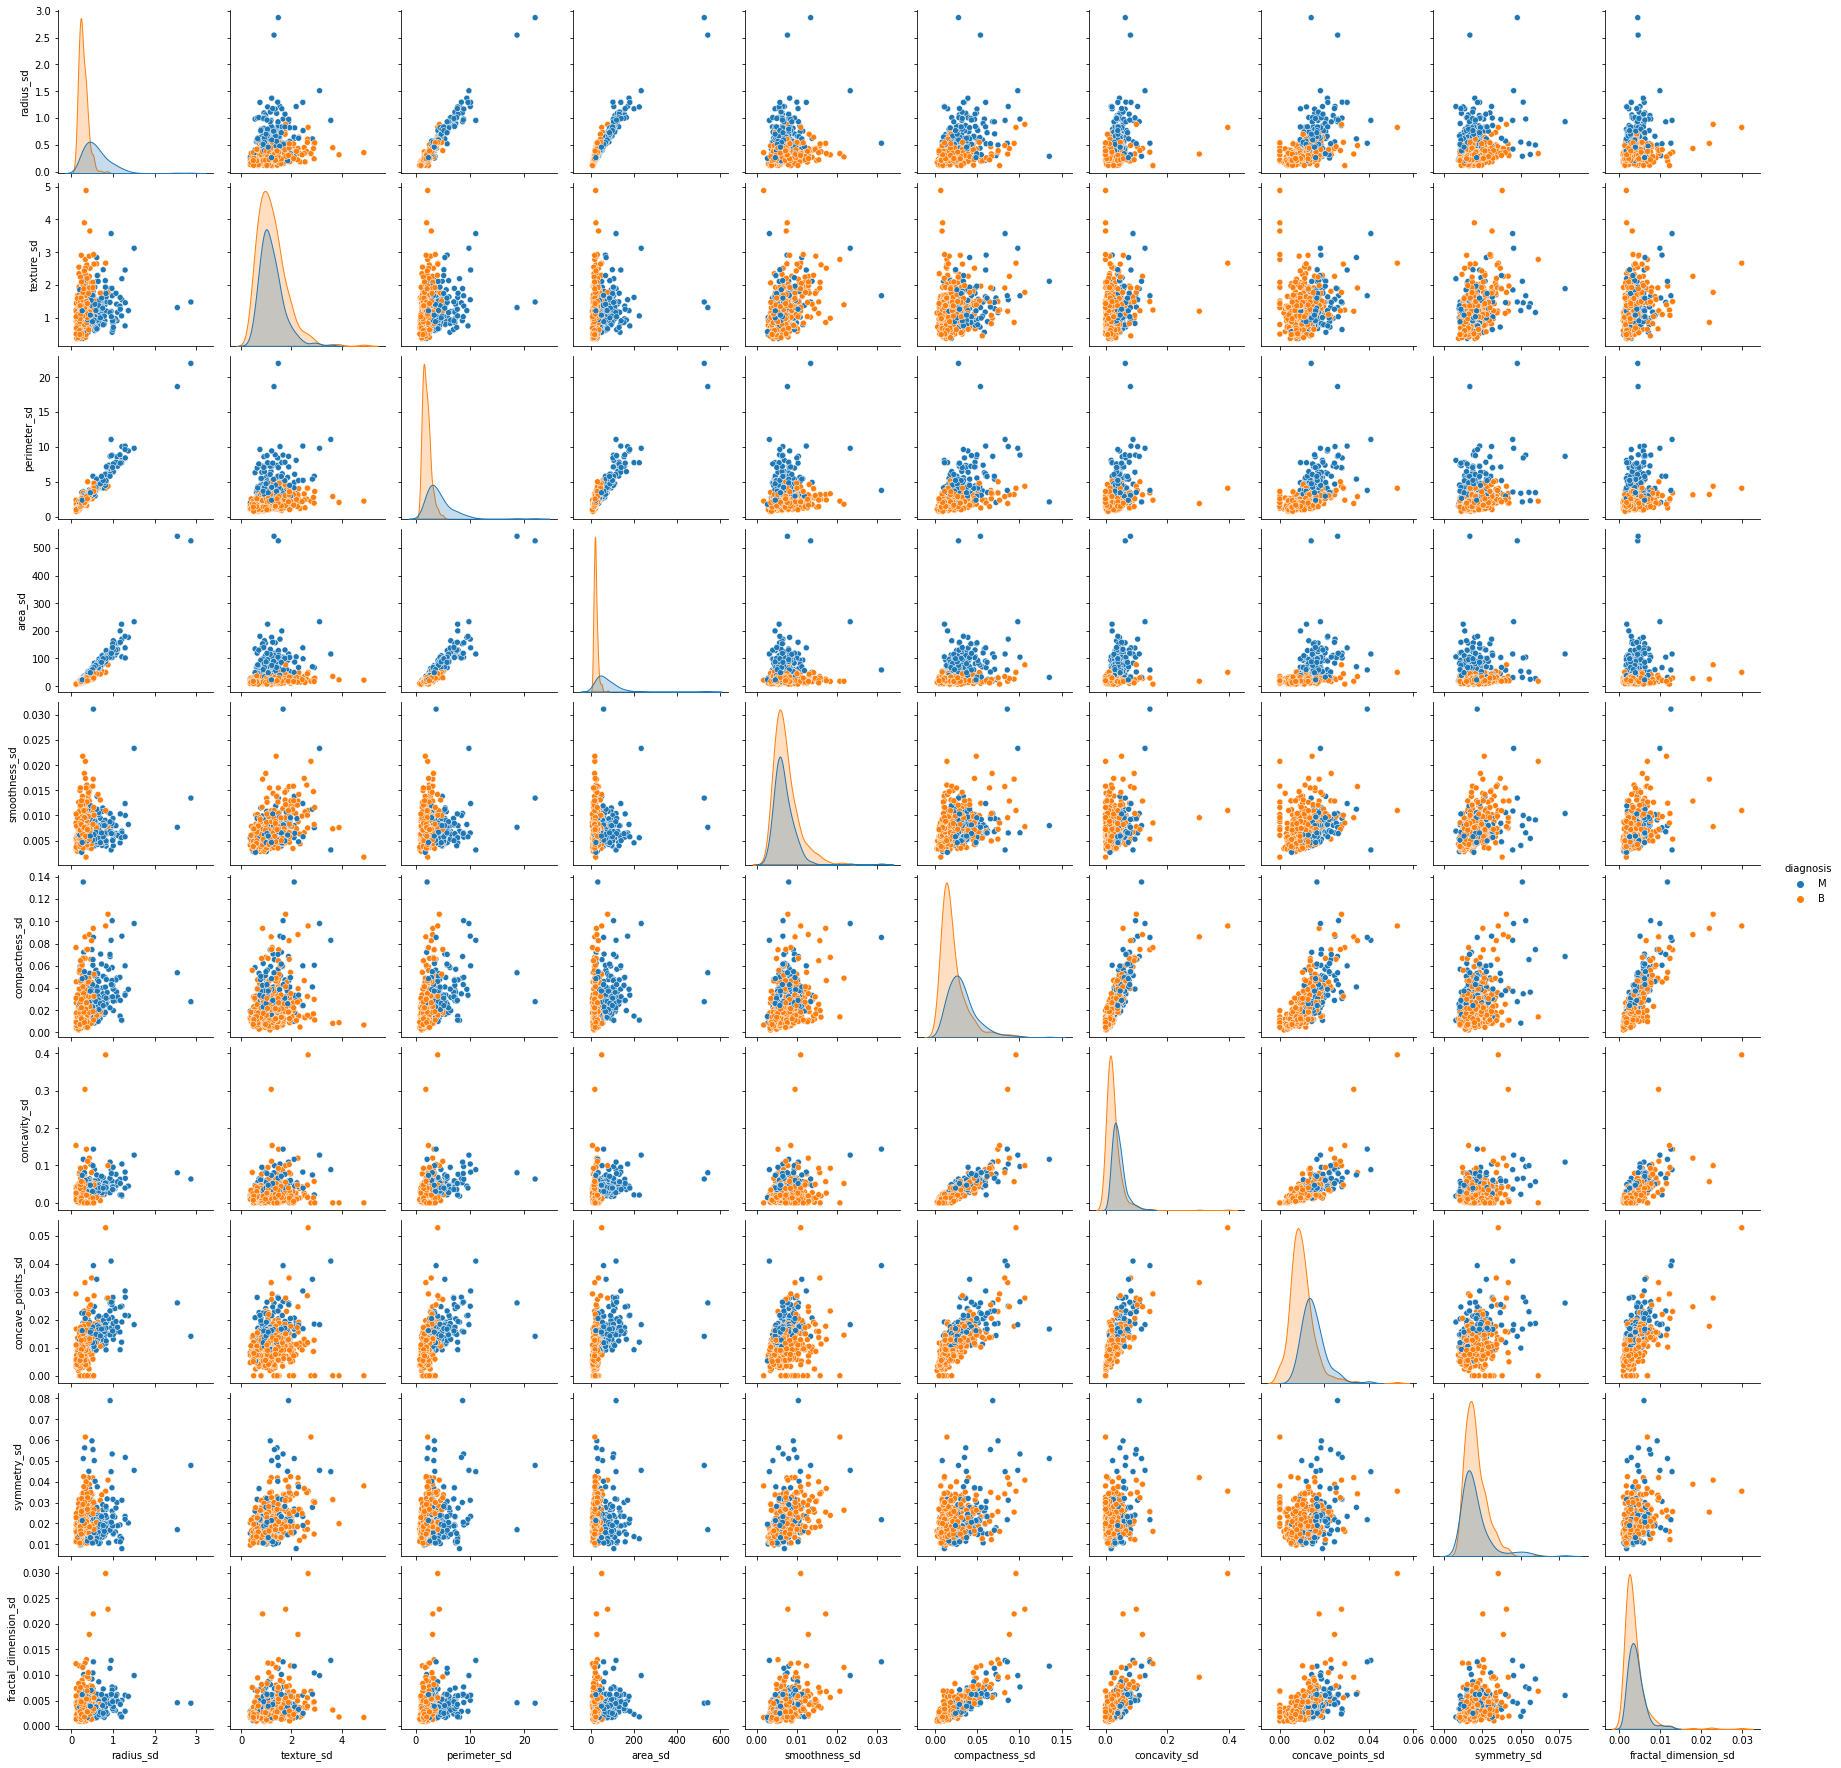

In [ ]:
rcParams['figure.figsize'] = 8,5
cols = ['radius_sd', 'texture_sd', 'perimeter_sd',
       'area_sd', 'smoothness_sd', 'compactness_sd', 'concavity_sd',
       'concave_points_sd', 'symmetry_sd ','fractal_dimension_sd','diagnosis']
sns_plot = sns.pairplot(data=new_data[cols],hue='diagnosis')

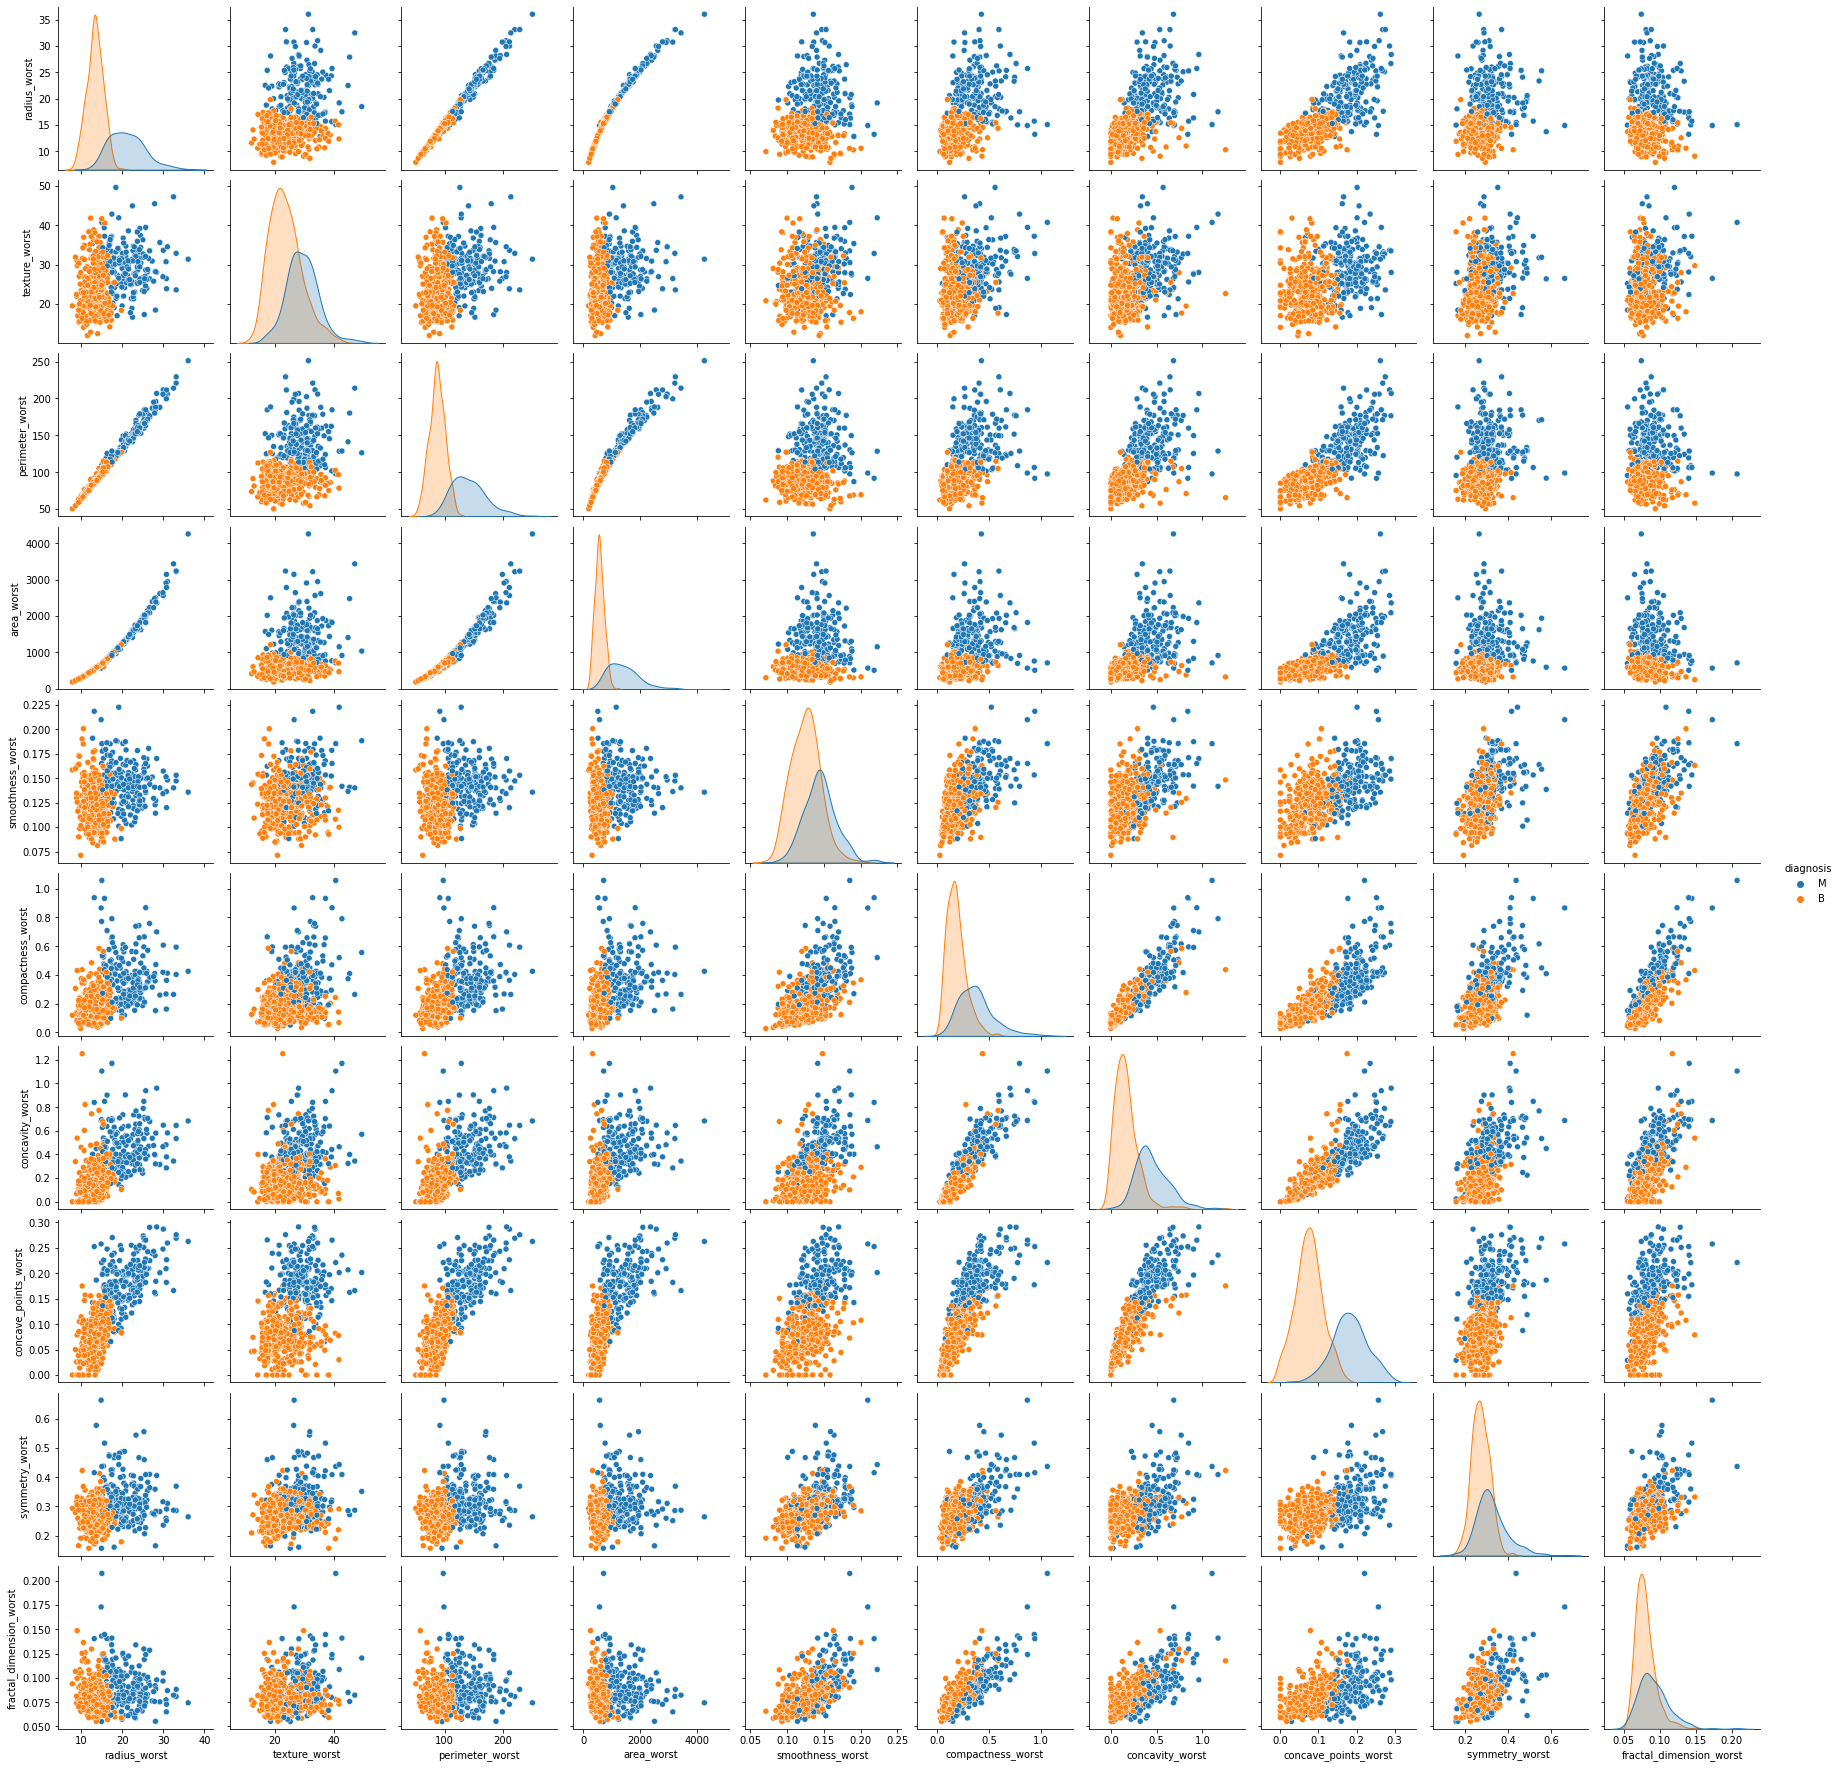

In [ ]:
rcParams['figure.figsize'] = 8,5
cols = ['radius_worst', 'texture_worst', 'perimeter_worst',
       'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave_points_worst', 'symmetry_worst ','fractal_dimension_worst','diagnosis']
sns_plot = sns.pairplot(data=new_data[cols],hue='diagnosis')

2. Distribution description

In [ ]:
new_data.describe()

radius_mean  texture_mean  ...  symmetry_worst   fractal_dimension_worst
count   569.000000    569.000000  ...       569.000000               569.000000
mean     14.205598     19.289649  ...         0.290076                 0.083946
std       3.524304      4.301036  ...         0.061867                 0.018061
min       6.981000      9.710000  ...         0.156500                 0.055040
25%      11.760000     16.170000  ...         0.250400                 0.071460
50%      13.400000     18.840000  ...         0.282200                 0.080040
75%      16.130000     21.800000  ...         0.317900                 0.092080
max      28.110000     39.280000  ...         0.663800                 0.207500

[8 rows x 30 columns]

From the kde plot and the pair plot, it is clear that the data provided varies over a wide range. From the distribution summary, it is evident that there is a huge difference between the minimum value and the maximum value. Hence feature scaling must be applied to this dataset.

Label Encodeing: Converting Maglignant(M) as 1 and Benign(B) as 0

In [ ]:
labelencoder_Y = LabelEncoder()
new_data.iloc[:,0] = labelencoder_Y.fit_transform(new_data.iloc[:,0].values)

In [ ]:
new_data

diagnosis  radius_mean  ...  symmetry_worst   fractal_dimension_worst
0            1        17.99  ...           0.4601                  0.11890
1            1        20.57  ...           0.2750                  0.08902
2            1        19.69  ...           0.3613                  0.08758
3            1        19.99  ...           0.6638                  0.17300
4            1        20.29  ...           0.2364                  0.07678
..         ...          ...  ...              ...                      ...
564          1        21.56  ...           0.2060                  0.07115
565          1        19.08  ...           0.2572                  0.06637
566          1        16.60  ...           0.2218                  0.07820
567          1        20.60  ...           0.4087                  0.12400
568          0         7.76  ...           0.2871                  0.07039

[569 rows x 31 columns]

Splitting of X and Y dataframe

In [ ]:
y_data = new_data['diagnosis'] #dataframe containing the diagnosis
new_data.drop('diagnosis', axis=1,inplace = True) #dataframe containg the features


3. Feature Scaling

No, all the features are not in the silimilar range. Hence Standard Scaling is used

In [ ]:
sc = StandardScaler()
final = sc.fit_transform(new_data)

In [ ]:
final = pd.DataFrame(final)
final

0         1         2   ...        27        28        29
0    1.074746 -2.073335  1.269934  ...  2.296076  2.750622  1.937015
1    1.807449 -0.353632  1.685955  ...  1.087084 -0.243890  0.281190
2    1.557535  0.456187  1.566503  ...  1.955000  1.152255  0.201391
3    1.642733  0.253732 -0.592687  ...  2.175786  6.046041  4.935010
4    1.727931 -1.151816  1.776573  ...  0.729259 -0.868353 -0.397100
..        ...       ...       ...  ...       ...       ...       ...
564  2.088603  0.721473  2.060786  ...  1.629151 -1.360158 -0.709091
565  1.384299  2.085134  1.615931  ...  0.733827 -0.531855 -0.973978
566  0.679995  2.045574  0.672676  ...  0.414069 -1.104549 -0.318409
567  1.815969  2.336457  1.982524  ...  2.289985  1.919083  2.219635
568 -1.830509  1.221792 -1.814389  ... -1.745063 -0.048138 -0.751207

[569 rows x 30 columns]

Feature Scaling is an important step to enhance the accuracy of a ML model. It includes rescaling the features such that they have the properties of a standard normal distribution with a mean of zero and a standard deviation of one.

In [ ]:
final_c = final.copy(deep=True)#copied so that the original data is not lost
final_c

0         1         2   ...        27        28        29
0    1.074746 -2.073335  1.269934  ...  2.296076  2.750622  1.937015
1    1.807449 -0.353632  1.685955  ...  1.087084 -0.243890  0.281190
2    1.557535  0.456187  1.566503  ...  1.955000  1.152255  0.201391
3    1.642733  0.253732 -0.592687  ...  2.175786  6.046041  4.935010
4    1.727931 -1.151816  1.776573  ...  0.729259 -0.868353 -0.397100
..        ...       ...       ...  ...       ...       ...       ...
564  2.088603  0.721473  2.060786  ...  1.629151 -1.360158 -0.709091
565  1.384299  2.085134  1.615931  ...  0.733827 -0.531855 -0.973978
566  0.679995  2.045574  0.672676  ...  0.414069 -1.104549 -0.318409
567  1.815969  2.336457  1.982524  ...  2.289985  1.919083  2.219635
568 -1.830509  1.221792 -1.814389  ... -1.745063 -0.048138 -0.751207

[569 rows x 30 columns]

In [ ]:
final['diagnosis'] = y_data
final

0         1         2  ...        28        29  diagnosis
0    1.074746 -2.073335  1.269934  ...  2.750622  1.937015          1
1    1.807449 -0.353632  1.685955  ... -0.243890  0.281190          1
2    1.557535  0.456187  1.566503  ...  1.152255  0.201391          1
3    1.642733  0.253732 -0.592687  ...  6.046041  4.935010          1
4    1.727931 -1.151816  1.776573  ... -0.868353 -0.397100          1
..        ...       ...       ...  ...       ...       ...        ...
564  2.088603  0.721473  2.060786  ... -1.360158 -0.709091          1
565  1.384299  2.085134  1.615931  ... -0.531855 -0.973978          1
566  0.679995  2.045574  0.672676  ... -1.104549 -0.318409          1
567  1.815969  2.336457  1.982524  ...  1.919083  2.219635          1
568 -1.830509  1.221792 -1.814389  ... -0.048138 -0.751207          0

[569 rows x 31 columns]

4. Heatmap

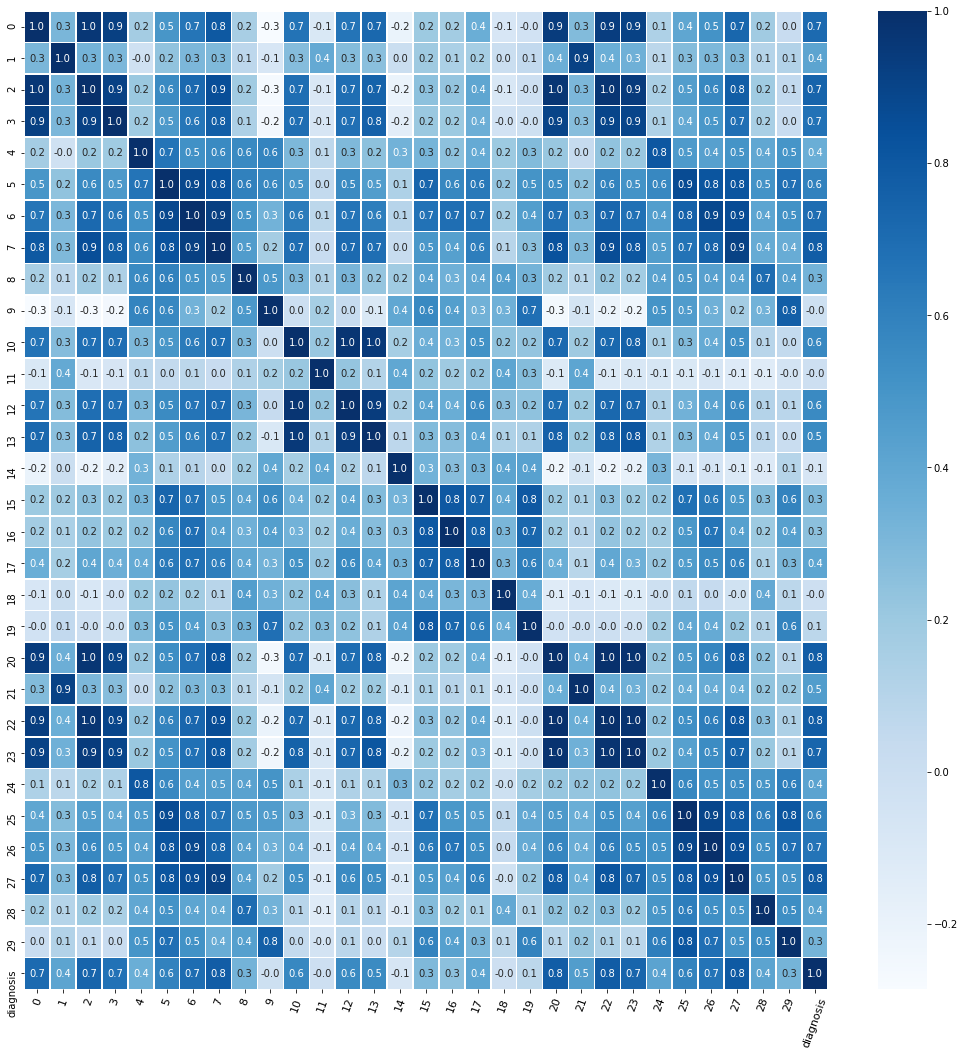

In [ ]:
f,ax = plt.subplots(figsize=(18, 18))
#cmap = sns.diverging_palette( 240 , 10 , as_cmap = True )
sns.heatmap(final.corr(), cmap='Blues',annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.xticks(fontsize=11,rotation=70)
plt.show()

Heatmap with K-Mean Clustering

In [ ]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(final)
kmeans.cluster_centers_

array([[-0.47527213, -0.24317347, -0.50757126, -0.46173741, -0.29139461,
        -0.50592914, -0.56891941, -0.58229829, -0.29998868, -0.11373902,
        -0.42679632, -0.01703257, -0.42700341, -0.40287934, -0.00179252,
        -0.34161981, -0.31628422, -0.38094788, -0.06495118, -0.1984934 ,
        -0.52479518, -0.25590863, -0.53708736, -0.50497738, -0.29833934,
        -0.47484627, -0.52473753, -0.57503215, -0.30066139, -0.30687565,
         0.09234828],
       [ 0.94804282,  0.48506708,  1.01247109,  0.92104462,  0.58125557,
         1.0091955 ,  1.1348445 ,  1.16153184,  0.59839847,  0.22687942,
         0.85134634,  0.03397549,  0.85175943,  0.80363826,  0.0035756 ,
         0.68144163,  0.63090379,  0.75989078,  0.12956052,  0.39594209,
         1.04682828,  0.51047037,  1.07134795,  1.00729699,  0.59510848,
         0.94719334,  1.04671328,  1.14703782,  0.59974035,  0.61213617,
         0.93157895]])

In [ ]:
k_df = pd.DataFrame(kmeans.labels_)
k_df

0
0    1
1    1
2    1
3    1
4    1
..  ..
564  1
565  1
566  1
567  1
568  0

[569 rows x 1 columns]

In [ ]:
final_c['diagnosis'] = k_df
final_c

0         1         2  ...        28        29  diagnosis
0    1.074746 -2.073335  1.269934  ...  2.750622  1.937015          1
1    1.807449 -0.353632  1.685955  ... -0.243890  0.281190          1
2    1.557535  0.456187  1.566503  ...  1.152255  0.201391          1
3    1.642733  0.253732 -0.592687  ...  6.046041  4.935010          1
4    1.727931 -1.151816  1.776573  ... -0.868353 -0.397100          1
..        ...       ...       ...  ...       ...       ...        ...
564  2.088603  0.721473  2.060786  ... -1.360158 -0.709091          1
565  1.384299  2.085134  1.615931  ... -0.531855 -0.973978          1
566  0.679995  2.045574  0.672676  ... -1.104549 -0.318409          1
567  1.815969  2.336457  1.982524  ...  1.919083  2.219635          1
568 -1.830509  1.221792 -1.814389  ... -0.048138 -0.751207          0

[569 rows x 31 columns]

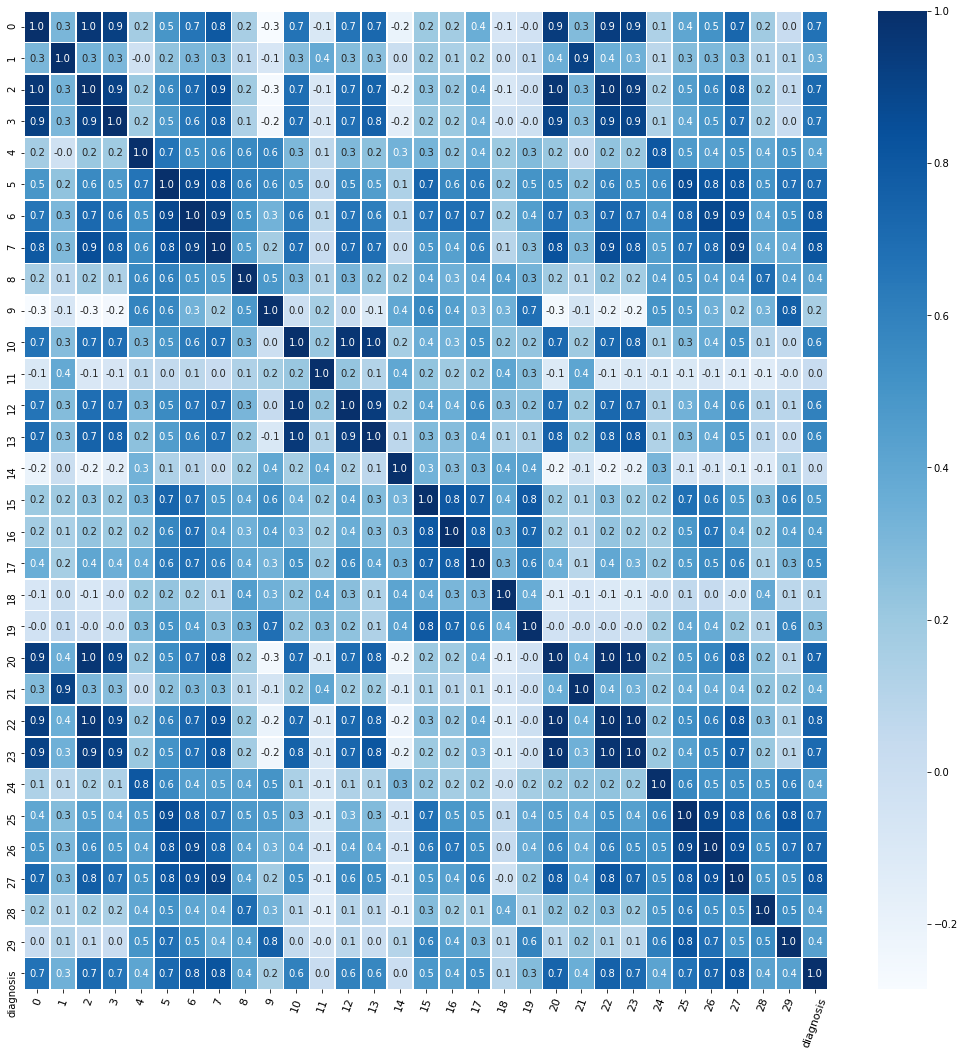

In [ ]:
f,ax = plt.subplots(figsize=(18, 18))
#cmap = sns.diverging_palette( 240 , 10 , as_cmap = True )
sns.heatmap(final_c.corr(), cmap='Blues',annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.xticks(fontsize=11,rotation=70)
plt.show()

5. Box plot

In [ ]:
stdX = (new_data - new_data.mean()) / (new_data.std())
data_st = pd.concat([y_data,stdX.iloc[:,:]],axis=1)
data_st = pd.melt(data_st,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')

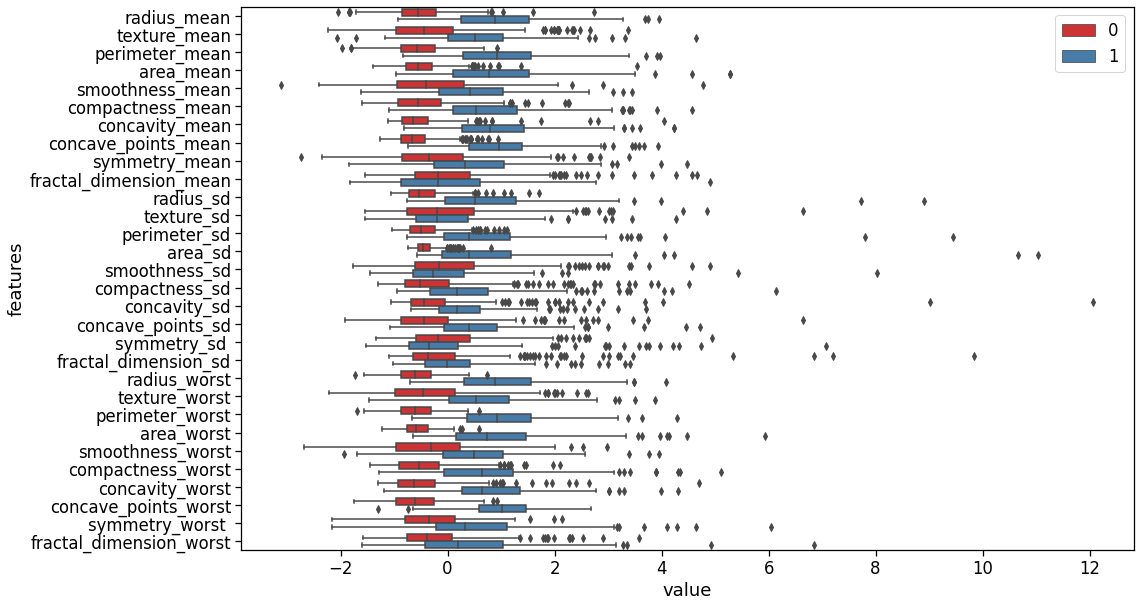

In [ ]:
plt.figure(figsize=(16,10))
sns.set_context('notebook', font_scale=1.5)
sns.boxplot(x="value", y="features", hue="diagnosis", data=data_st, palette='Set1')
plt.legend(loc='best')

5. Violin Plot

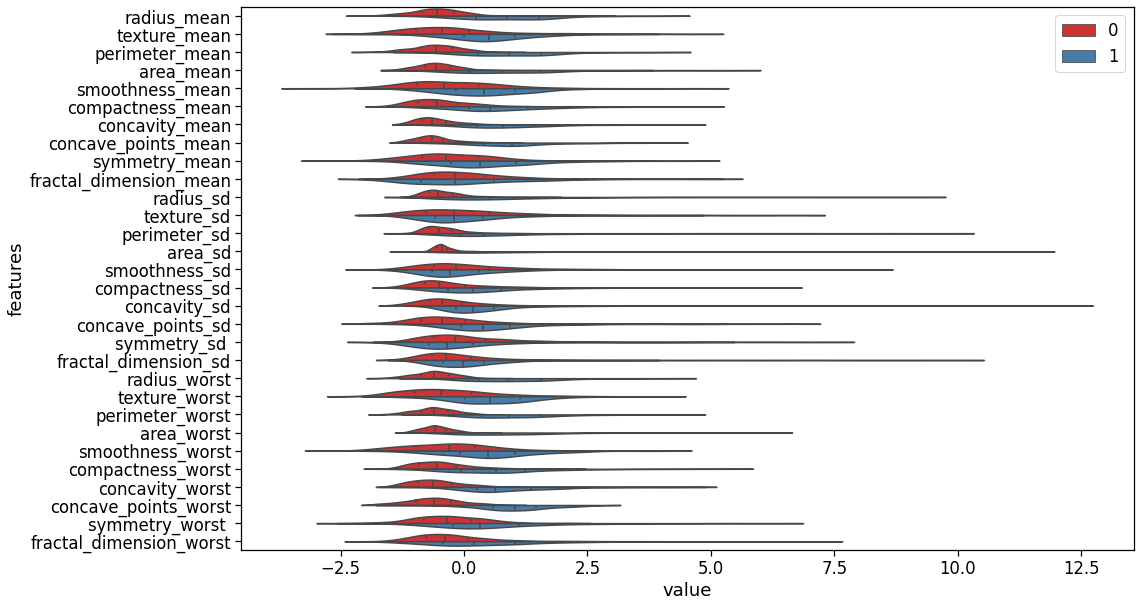

In [ ]:
plt.figure(figsize=(16,10))
sns.set_context('notebook', font_scale=1.5)
sns.violinplot(x="value", y="features", hue="diagnosis", data=data_st,split=True,
               inner="quart", palette='Set1')
plt.legend(loc='best');


6. So from the pair plots and facet grids we identify those features for which there is observable pattern in which the malignant and benign tumors differentiate. These features, Radius mean, Perimeter mean, Area mean, Concave point mean, Radius worst, have graphs where the malignant and benign tumaors form peak very differently and their area of intersection is very less. That is why it seems visually that these features might be the most important features while predicting whether a tumor is malignant or benign

**PART II**

7.a Determination of p-value and t-statistic and combining to form a table

In [ ]:
a = new_data.loc[data['diagnosis']== 'M', 'radius_mean'].to_numpy()
b = new_data.loc[data['diagnosis']== 'B', 'radius_mean'].to_numpy()
st.ttest_ind(a=a, b=b, equal_var=True)

Ttest_indResult(statistic=23.927982219258617, pvalue=5.37931834871424e-88)

In [ ]:
a = new_data.loc[data['diagnosis']== 'M', 'texture_mean'].to_numpy()
b = new_data.loc[data['diagnosis']== 'B', 'texture_mean'].to_numpy()
st.ttest_ind(a=a, b=b, equal_var=True)

Ttest_indResult(statistic=10.86720108146434, pvalue=4.0586360478980736e-25)

In [ ]:
a = new_data.loc[data['diagnosis']== 'M', 'perimeter_mean'].to_numpy()
b = new_data.loc[data['diagnosis']== 'B', 'perimeter_mean'].to_numpy()
st.ttest_ind(a=a, b=b, equal_var=True)

Ttest_indResult(statistic=26.405212979192665, pvalue=8.43625103617473e-101)

In [ ]:
a = new_data.loc[data['diagnosis']== 'M', 'area_mean'].to_numpy()
b = new_data.loc[data['diagnosis']== 'B', 'area_mean'].to_numpy()
st.ttest_ind(a=a, b=b, equal_var=True)

Ttest_indResult(statistic=21.46974647163133, pvalue=2.785597895208498e-75)

In [ ]:
a = new_data.loc[data['diagnosis']== 'M', 'smoothness_mean'].to_numpy()
b = new_data.loc[data['diagnosis']== 'B', 'smoothness_mean'].to_numpy()
st.ttest_ind(a=a, b=b, equal_var=True)

Ttest_indResult(statistic=9.146098808149038, pvalue=1.0518503592032013e-18)

In [ ]:
a = new_data.loc[data['diagnosis']== 'M', 'compactness_mean'].to_numpy()
b = new_data.loc[data['diagnosis']== 'B', 'compactness_mean'].to_numpy()
st.ttest_ind(a=a, b=b, equal_var=True)

Ttest_indResult(statistic=17.69839197688993, pvalue=3.9382631058873895e-56)

In [ ]:
a = new_data.loc[data['diagnosis']== 'M', 'concavity_mean'].to_numpy()
b = new_data.loc[data['diagnosis']== 'B', 'concavity_mean'].to_numpy()
st.ttest_ind(a=a, b=b, equal_var=True)

Ttest_indResult(statistic=23.103963430622642, pvalue=9.966555755072963e-84)

In [ ]:
a = new_data.loc[data['diagnosis']== 'M', 'concave_points_mean'].to_numpy()
b = new_data.loc[data['diagnosis']== 'B', 'concave_points_mean'].to_numpy()
st.ttest_ind(a=a, b=b, equal_var=True)

Ttest_indResult(statistic=29.354318592113618, pvalue=7.101150161057422e-116)

In [ ]:
a = new_data.loc[data['diagnosis']== 'M', 'symmetry_mean'].to_numpy()
b = new_data.loc[data['diagnosis']== 'B', 'symmetry_mean'].to_numpy()
st.ttest_ind(a=a, b=b, equal_var=True)

Ttest_indResult(statistic=8.338311789592808, pvalue=5.733384028466827e-16)

In [ ]:
a = new_data.loc[data['diagnosis']== 'M', 'fractal_dimension_mean'].to_numpy()
b = new_data.loc[data['diagnosis']== 'B', 'fractal_dimension_mean'].to_numpy()
st.ttest_ind(a=a, b=b, equal_var=True)

Ttest_indResult(statistic=-0.30571112978583087, pvalue=0.7599368037256238)

In [ ]:
a = new_data.loc[data['diagnosis']== 'M', 'radius_sd'].to_numpy()
b = new_data.loc[data['diagnosis']== 'B', 'radius_sd'].to_numpy()
st.ttest_ind(a=a, b=b, equal_var=True)

Ttest_indResult(statistic=16.396351025985748, pvalue=9.738948656461507e-50)

In [ ]:
a = new_data.loc[data['diagnosis']== 'M', 'texture_sd'].to_numpy()
b = new_data.loc[data['diagnosis']== 'B', 'texture_sd'].to_numpy()
st.ttest_ind(a=a, b=b, equal_var=True)


Ttest_indResult(statistic=-0.1977238031013334, pvalue=0.8433320287670163)

In [ ]:
a = new_data.loc[data['diagnosis']== 'M', 'perimeter_sd'].to_numpy()
b = new_data.loc[data['diagnosis']== 'B', 'perimeter_sd'].to_numpy()
st.ttest_ind(a=a, b=b, equal_var=True)

Ttest_indResult(statistic=15.934158019257902, pvalue=1.6519051758498057e-47)

In [ ]:
a = new_data.loc[data['diagnosis']== 'M', 'area_sd'].to_numpy()
b = new_data.loc[data['diagnosis']== 'B', 'area_sd'].to_numpy()
st.ttest_ind(a=a, b=b, equal_var=True)

Ttest_indResult(statistic=15.609342900255001, pvalue=5.8955213926058635e-46)

In [ ]:
a = new_data.loc[data['diagnosis']== 'M', 'smoothness_sd'].to_numpy()
b = new_data.loc[data['diagnosis']== 'B', 'smoothness_sd'].to_numpy()
st.ttest_ind(a=a, b=b, equal_var=True)

Ttest_indResult(statistic=-1.599364812413284, pvalue=0.11029660865789295)

In [ ]:
a = new_data.loc[data['diagnosis']== 'M', 'compactness_sd'].to_numpy()
b = new_data.loc[data['diagnosis']== 'B', 'compactness_sd'].to_numpy()
st.ttest_ind(a=a, b=b, equal_var=True)

Ttest_indResult(statistic=7.2970774374485305, pvalue=9.975994654074587e-13)

In [ ]:
a = new_data.loc[data['diagnosis']== 'M', 'concavity_sd'].to_numpy()
b = new_data.loc[data['diagnosis']== 'B', 'concavity_sd'].to_numpy()
st.ttest_ind(a=a, b=b, equal_var=True)

Ttest_indResult(statistic=6.246157343266937, pvalue=8.260176167970051e-10)

In [ ]:
a = new_data.loc[data['diagnosis']== 'M', 'concave_points_sd'].to_numpy()
b = new_data.loc[data['diagnosis']== 'B', 'concave_points_sd'].to_numpy()
st.ttest_ind(a=a, b=b, equal_var=True)

Ttest_indResult(statistic=10.64249782452053, pvalue=3.0723087688180654e-24)

In [ ]:
a = new_data.loc[data['diagnosis']== 'M', 'symmetry_sd '].to_numpy()
b = new_data.loc[data['diagnosis']== 'B', 'symmetry_sd '].to_numpy()
st.ttest_ind(a=a, b=b, equal_var=True)

Ttest_indResult(statistic=-0.1552978000059369, pvalue=0.8766418183858812)

In [ ]:
a = new_data.loc[data['diagnosis']== 'M', 'fractal_dimension_sd'].to_numpy()
b = new_data.loc[data['diagnosis']== 'B', 'fractal_dimension_sd'].to_numpy()
st.ttest_ind(a=a, b=b, equal_var=True)

Ttest_indResult(statistic=1.862330463973157, pvalue=0.06307355082239346)

In [ ]:
a = new_data.loc[data['diagnosis']== 'M', 'radius_worst'].to_numpy()
b = new_data.loc[data['diagnosis']== 'B', 'radius_worst'].to_numpy()
st.ttest_ind(a=a, b=b, equal_var=True)

Ttest_indResult(statistic=29.33908156342075, pvalue=8.482291921684414e-116)

In [ ]:
a = new_data.loc[data['diagnosis']== 'M', 'texture_worst'].to_numpy()
b = new_data.loc[data['diagnosis']== 'B', 'texture_worst'].to_numpy()
st.ttest_ind(a=a, b=b, equal_var=True)

Ttest_indResult(statistic=12.23098134599393, pvalue=1.0780574879494241e-30)

In [ ]:
a = new_data.loc[data['diagnosis']== 'M', 'perimeter_worst'].to_numpy()
b = new_data.loc[data['diagnosis']== 'B', 'perimeter_worst'].to_numpy()
st.ttest_ind(a=a, b=b, equal_var=True)

Ttest_indResult(statistic=29.965717392710303, pvalue=5.771397139668621e-119)

In [ ]:
a = new_data.loc[data['diagnosis']== 'M', 'area_worst'].to_numpy()
b = new_data.loc[data['diagnosis']== 'B', 'area_worst'].to_numpy()
st.ttest_ind(a=a, b=b, equal_var=True)

Ttest_indResult(statistic=25.721590260589004, pvalue=2.828847704286693e-97)

In [ ]:
a = new_data.loc[data['diagnosis']== 'M', 'smoothness_worst'].to_numpy()
b = new_data.loc[data['diagnosis']== 'B', 'smoothness_worst'].to_numpy()
st.ttest_ind(a=a, b=b, equal_var=True)

Ttest_indResult(statistic=11.066746606769504, pvalue=6.575143633984769e-26)

In [ ]:
a = new_data.loc[data['diagnosis']== 'M', 'compactness_worst'].to_numpy()
b = new_data.loc[data['diagnosis']== 'B', 'compactness_worst'].to_numpy()
st.ttest_ind(a=a, b=b, equal_var=True)

Ttest_indResult(statistic=17.445373681975457, pvalue=7.069816352538377e-55)

In [ ]:
a = new_data.loc[data['diagnosis']== 'M', 'concavity_worst'].to_numpy()
b = new_data.loc[data['diagnosis']== 'B', 'concavity_worst'].to_numpy()
st.ttest_ind(a=a, b=b, equal_var=True)

Ttest_indResult(statistic=20.897175392934134, pvalue=2.4646639567829224e-72)

In [ ]:
a = new_data.loc[data['diagnosis']== 'M', 'concave_points_worst'].to_numpy()
b = new_data.loc[data['diagnosis']== 'B', 'concave_points_worst'].to_numpy()
st.ttest_ind(a=a, b=b, equal_var=True)

Ttest_indResult(statistic=31.054555115984236, pvalue=1.9690997072164375e-124)

In [ ]:
a = new_data.loc[data['diagnosis']== 'M', 'symmetry_worst '].to_numpy()
b = new_data.loc[data['diagnosis']== 'B', 'symmetry_worst '].to_numpy()
st.ttest_ind(a=a, b=b, equal_var=True)

Ttest_indResult(statistic=10.902303982929364, pvalue=2.951120577154039e-25)

In [ ]:
a = new_data.loc[data['diagnosis']== 'M', 'fractal_dimension_worst' ].to_numpy()
b = new_data.loc[data['diagnosis']== 'B', 'fractal_dimension_worst'].to_numpy()
st.ttest_ind(a=a, b=b, equal_var=True)

Ttest_indResult(statistic=8.151316497940705, pvalue=2.316432449982829e-15)

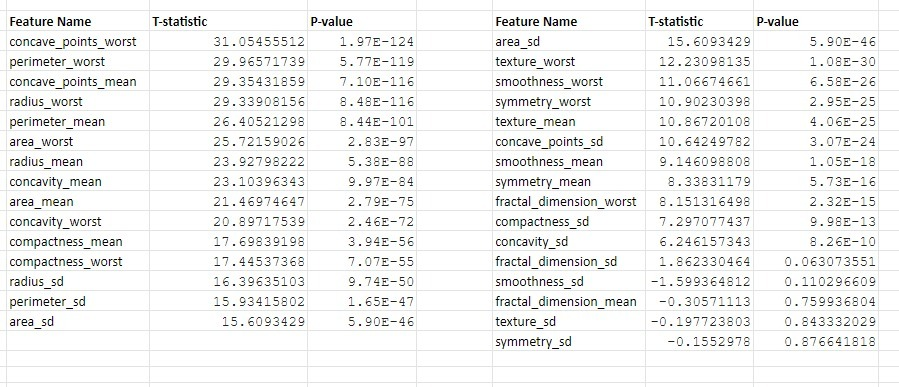

7.b The rows of the table are reordered. From the above snippet it is clear that concave_points_worst, perimeter_worst, concave_points_mean,radius_worst, perimeter_mean are the most significant features since their p-values is less than the significance level.


7.c The features identified in the Q6 are almost the same as the top features identified from the table cretaed according to the p-value

8.a Probability of at least one significant result

In [ ]:
alpha = 0.05
hyp = 30
no_sign = (1 - alpha)**hyp
atleast_one = 1 - no_sign
print("Probability of atleast one significant result: ",atleast_one)

Probability of atleast one significant result:  0.7853612360570628


8.b Benferroni Correction is applied. P-values less than the signficant cut_off are considered to be significant features

In [ ]:
alpha = 0.05
test_cases = 30
sign_cut_off = alpha / test_cases
sign_cut_off


0.0016666666666666668

8.c No change in significant features were identified

9. PCA

In [ ]:
target_pca = pd.DataFrame(y_data)
data_pca = final.drop('diagnosis',axis=1)

pca = PCA(0.95)
pca_std = pca.fit(data_pca,target_pca).transform(data_pca)

pca_std = pd.DataFrame(pca_std)
pca_std = pca_std.merge(target_pca, left_index = True, right_index = True,how ='left')


9.a 11 principal components are needed to explain 95% variance

In [ ]:
pca_std

0         1         2  ...         9        10  diagnosis
0     9.217748  1.834391 -1.121175  ... -0.885106  0.139813          1
1     2.335765 -3.775019 -0.524278  ...  1.107922  0.872443          1
2     5.716955 -1.131485 -0.547347  ...  0.486295 -0.562461          1
3     8.273693  9.082147 -3.199867  ... -0.721675 -0.707863          1
4     3.901476 -1.966617  1.391603  ...  0.364219  0.652344          1
..         ...       ...       ...  ...       ...       ...        ...
564   6.394957 -3.636253  2.468625  ...  0.277242  0.009506          1
565   3.684781 -3.547883  2.100700  ... -0.118820  0.278703          1
566   1.228885 -1.906047  0.568121  ...  0.548825 -0.795589          1
567  10.390386  1.558082 -1.872225  ... -0.094222 -0.252931          1
568  -5.484215 -0.617398  1.491301  ... -0.093349 -0.211890          0

[569 rows x 12 columns]

In [ ]:
pca.explained_variance_ratio_

array([0.4397913 , 0.1871888 , 0.09391527, 0.06604854, 0.05488605,
       0.04026086, 0.02239899, 0.01600364, 0.01439184, 0.01164732,
       0.00976705])

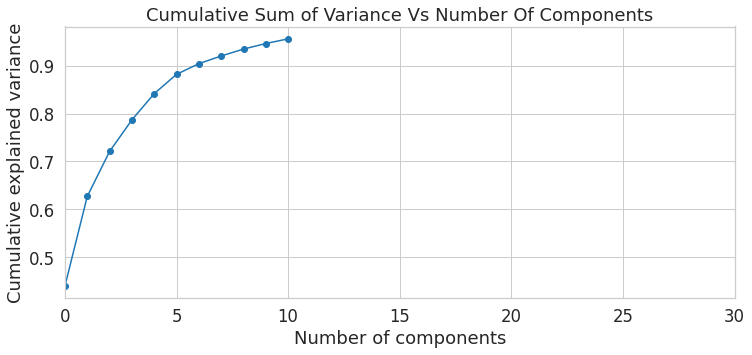

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_),marker='o')
plt.xlim(0,30,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('Cumulative Sum of Variance Vs Number Of Components')
plt.show()

In [ ]:
pca_breast = PCA(n_components=10)
principalComponents_breast = pca_breast.fit_transform(data_pca)

In [ ]:
principal_breast_Df = pd.DataFrame(data = principalComponents_breast
             , columns = ['principal component 1', 'principal component 2','principal component 3','principal component 4','principal component 5','principal component 6','principal component 7','principal component 8','principal component 9','principal component 10'])

In [ ]:
principal_breast_Df

principal component 1  ...  principal component 10
0                 9.217748  ...               -0.885099
1                 2.335765  ...                1.107914
2                 5.716955  ...                0.486304
3                 8.273693  ...               -0.721647
4                 3.901476  ...                0.364217
..                     ...  ...                     ...
564               6.394957  ...                0.277252
565               3.684781  ...               -0.118816
566               1.228885  ...                0.548831
567              10.390386  ...               -0.094213
568              -5.484215  ...               -0.093337

[569 rows x 10 columns]

9.b PCA scores plot

0       True
1       True
2       True
3       True
4       True
       ...  
564     True
565     True
566     True
567     True
568    False
Name: diagnosis, Length: 569, dtype: bool


<Figure size 576x360 with 0 Axes>

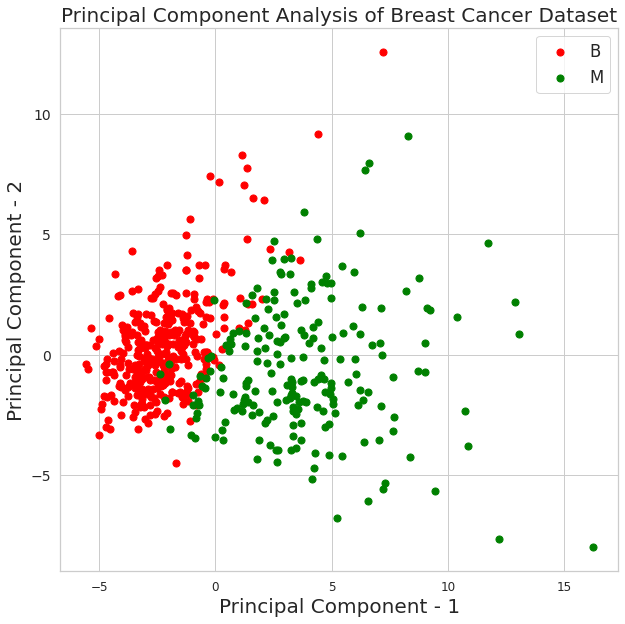

In [ ]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=20)

targets = ['B', 'M']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = data['diagnosis'] == target
    plt.scatter(principal_breast_Df.loc[indicesToKeep, 'principal component 1']
               , principal_breast_Df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)
print(indicesToKeep)

plt.legend(targets)

**PART III**

In [ ]:
x = final.drop('diagnosis',axis=1)
y = final['diagnosis']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2,random_state =42)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)

y_pred

array([ 0.36601466,  0.81511731,  0.71438807, -0.12047662, -0.10896846,
        1.66809929,  1.0767177 ,  0.56790524,  0.75595328,  0.04319439,
        0.21250777,  0.6581162 ,  0.10124301,  0.58265024,  0.06546715,
        0.82312599,  0.09834489, -0.2011719 , -0.4000742 ,  0.92780678,
        0.2853384 ,  0.12840035,  1.4010768 , -0.08373371,  0.03689539,
        0.16443744,  0.00970795,  0.13982161,  0.05439966,  1.15081687,
       -0.02790321, -0.04513519,  0.19737958,  0.07720434, -0.05059467,
        0.09802553,  0.52218018,  0.37962936,  0.73814461,  0.22262744,
       -0.18020673,  0.96279164,  0.0271174 , -0.10398418,  0.46531324,
        0.35070892,  0.07186898, -0.03000801,  0.19386684, -0.0300161 ,
        0.78397559,  1.09536744,  0.43404215,  0.41861793, -0.03844603,
        0.21358831,  0.04780828,  1.36506434,  0.44130287, -0.0489828 ,
        0.05062582,  1.20199575,  1.36353465,  0.19721968,  0.10162254,
        0.40699623,  1.15082219,  1.07989501,  0.01730336,  0.17

In [ ]:
scaler = StandardScaler()
Ys = scaler.fit_transform(pd.DataFrame(y_pred))

In [ ]:
pip install reshape

In [ ]:
len(y_test)

114

In [ ]:
y_pred = np.array(y_pred)
y_test = np.array(y_test)

In [ ]:
np.set_printoptions(precision=2)
print(np.concatenate((np.reshape(y_pred, (len(y_pred),1)), np.reshape(y_test, (len(y_test),1))),1))

[[ 0.37  0.  ]
 [ 0.82  1.  ]
 [ 0.71  1.  ]
 [-0.12  0.  ]
 [-0.11  0.  ]
 [ 1.67  1.  ]
 [ 1.08  1.  ]
 [ 0.57  1.  ]
 [ 0.76  0.  ]
 [ 0.04  0.  ]
 [ 0.21  0.  ]
 [ 0.66  1.  ]
 [ 0.1   0.  ]
 [ 0.58  1.  ]
 [ 0.07  0.  ]
 [ 0.82  1.  ]
 [ 0.1   0.  ]
 [-0.2   0.  ]
 [-0.4   0.  ]
 [ 0.93  1.  ]
 [ 0.29  1.  ]
 [ 0.13  0.  ]
 [ 1.4   1.  ]
 [-0.08  0.  ]
 [ 0.04  0.  ]
 [ 0.16  0.  ]
 [ 0.01  0.  ]
 [ 0.14  0.  ]
 [ 0.05  0.  ]
 [ 1.15  1.  ]
 [-0.03  0.  ]
 [-0.05  0.  ]
 [ 0.2   0.  ]
 [ 0.08  0.  ]
 [-0.05  0.  ]
 [ 0.1   0.  ]
 [ 0.52  1.  ]
 [ 0.38  0.  ]
 [ 0.74  1.  ]
 [ 0.22  0.  ]
 [-0.18  0.  ]
 [ 0.96  1.  ]
 [ 0.03  0.  ]
 [-0.1   0.  ]
 [ 0.47  0.  ]
 [ 0.35  0.  ]
 [ 0.07  0.  ]
 [-0.03  0.  ]
 [ 0.19  0.  ]
 [-0.03  0.  ]
 [ 0.78  1.  ]
 [ 1.1   1.  ]
 [ 0.43  0.  ]
 [ 0.42  0.  ]
 [-0.04  0.  ]
 [ 0.21  0.  ]
 [ 0.05  0.  ]
 [ 1.37  1.  ]
 [ 0.44  1.  ]
 [-0.05  0.  ]
 [ 0.05  0.  ]
 [ 1.2   1.  ]
 [ 1.36  1.  ]
 [ 0.2   0.  ]
 [ 0.1   0.  ]
 [ 0.41  0.  ]
 [ 1.15  1

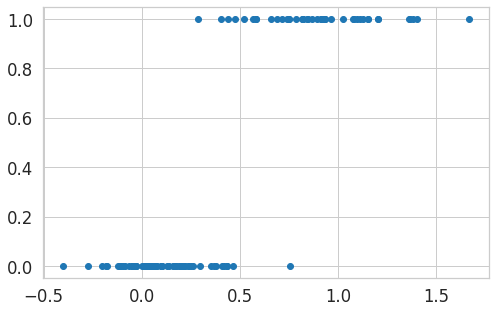

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_pred, y_test)
plt.show()

10.a As seen from the graph all the tumors which correspond to 0 diagnosis have y_pred values from -0.5 to 0.5 approximately (excluding the outlier), and all tumores corresponding to 1 diagnosis have y_pred values approximately ranging from 0.5 to 1.5 (excluding the outlier). But the cutoff here is extremely crucial and might change the diagnosis if not selected properly. The cutoff 0.5 seems apporiate over here as apart from all outliers the data seem to fit as it should. If we decrease the cutoff to 0.4 or below, a lot of tumors actually identified as 0 will be misidetified as 1 . And id we increate the cutoff to 0.6 or above a lot of tumor identified as 1 will be misidentified as zero. So selecting a appropriate cutoff is important if we use such regression linear relation. But in our case we use a classifier , which solves our problem. So from here we can infer how the accuracy changes with the change in cutoff for y_pred. This same implies for any feature x . If the database had a single feature, putting one cutoff to it would allow us to identify whether the tumor is benign or malignant. But as the database is a multi feature database, with the help of any model, we combine it to be one, and who's cutoff set , allows us to identify the same.



In [ ]:
y_pred_1 = (y_pred > 0.5)
print(np.concatenate((np.reshape(y_pred_1, (len(y_pred_1),1)), np.reshape(y_test, (len(y_test),1))),1))

[[0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]]


In [ ]:
cm = confusion_matrix(y_test, y_pred_1)
print(cm)
accuracy_score(y_test, y_pred_1)

[[70  1]
 [ 4 39]]


0.956140350877193

In [ ]:
y_p = (y_pred > 0.1)
print(np.concatenate((np.reshape(y_p, (len(y_p),1)), np.reshape(y_test, (len(y_test),1))),1))

[[1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 0]
 [1 0]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [1 0]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [0 0]
 [1 0]
 [1 1]]


In [ ]:
cm = confusion_matrix(y_test, y_p)
print(cm)
accuracy_score(y_test, y_p)

[[38 33]
 [ 0 43]]


0.7105263157894737

As seen decreasing the cutoff decreases the accuracy score.

In [ ]:
y_pr = (y_pred > 1)
print(np.concatenate((np.reshape(y_pr, (len(y_pr),1)), np.reshape(y_test, (len(y_test),1))),1))

[[0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [0 1]
 [0 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]]


In [ ]:
cm = confusion_matrix(y_test, y_pr)
print(cm)
accuracy_score(y_test, y_pr)

[[71  0]
 [28 15]]


0.7543859649122807

Again by increasing the cutoff we see the accuracy decreases.

10.b To minimize both type I and type II error that is needed is simply to abandon significance testing. If one is able to remove such a restriction on data both the errors can be removed. In this case if we can identify a threshold where there is no overlap in the graph both errors will be reduced.

For breast cancer data modeling,as done in this case anything that doesn't account for false-negatives is extremel;y dangerous and might affect someones life. So we prefer Recall as it a better method of measuaring the data taking into account the false-negatives. In other cases such as YouTube recommendations, false-negatives is less of a concern.There Precision is better here.

11. Machine Learning model

In [ ]:
x = final.drop('diagnosis',axis=1)
y = final['diagnosis']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2,random_state =42)

In [ ]:
classifier = SVC(kernel = 'linear', random_state=42)
classifier.fit(x_train,y_train)



SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
y_pred = classifier.predict(x_test)
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1])

In [ ]:
cm = confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[68  3]
 [ 2 41]]


0.956140350877193

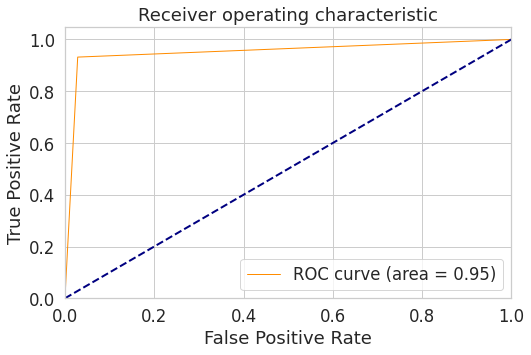

In [ ]:
fpr, tpr, _ = roc_curve(y_pred,y_test)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


Precision Recall Curve

In [ ]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_pred)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.91


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.91')

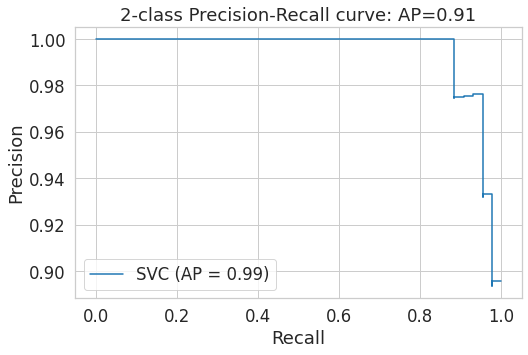

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(classifier, x_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))